In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.cluster import KMeans,AgglomerativeClustering
# from sklearn.metrics import silhouette_score,davies_bouldin_score
# from sklearn.preprocessing import StandardScaler,normalize,RobustScaler,MinMaxScaler
# import scipy.cluster.hierarchy as shc
# from scipy.cluster.hierarchy import dendrogram, linkage
# import collections
# from sklearn.decomposition import PCA, KernelPCA,TruncatedSVD
# %matplotlib inline 



# # all_vars = pd.read_csv('all_vars_outliers_removed copy.csv',header = 0,
# #                        usecols = ['times','Bx','By','Bz','Vx','Vy','Vz','n','Tpara','Tperp'])


# # all_vars

# Data Preprocessing

In [13]:
# fig,ax = plt.subplots(figsize=(20, 10), facecolor='w', edgecolor='k')

# ax = sns.heatmap(all_vars.corr(),
#             annot = True,
#             linewidths = .5,
#             center = 0,
#             cmap="BuPu",
#             vmin=-1,
#             vmax=1)

# plt.title("Correlation Heatmap")
# plt.show()

# Feature Scaling

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.preprocessing import StandardScaler,normalize,RobustScaler,MinMaxScaler
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
import collections
from sklearn.decomposition import PCA, KernelPCA,TruncatedSVD
%matplotlib inline 

import sys
sys.setrecursionlimit(10000) # or any number you want

all_vars = pd.read_csv('all_vars_outliers_removed.csv',header = 0,
                       usecols = ['times','Bx','By','Bz','Vx','Vy','Vz','n','Tpara','Tperp'])


# Scale data 
MMS2_vals = ['times','Bx','By','Bz','Vx','Vy','Vz','n','Tpara','Tperp']


# Scaling with standard scaler
ss_x = StandardScaler().fit_transform(all_vars[MMS2_vals].values)

# scale with robust
rob_x = RobustScaler().fit_transform(all_vars[MMS2_vals].values)


# scale with minmax
min_x = MinMaxScaler().fit_transform(all_vars[MMS2_vals].values)


# K-means Clustering

## The Elbow method

In [100]:
# WCSS is the sum of square distances between the centroids and each data point.
WCSS = []

# define k-values to go from 1 to 10
k_vals = range(1,10)
# For each value of k, calculate the within-cluster sum of squares (WCSS) value


centers=[]
for k in k_vals:
    K_means = KMeans(n_clusters = k,init = 'k-means++')
    model = K_means.fit(all_vars[MMS2_vals].values)
    WCSS.append(K_means.inertia_)
    #print((K_means.cluster_centers_))
    centers.append(K_means.cluster_centers_)
    

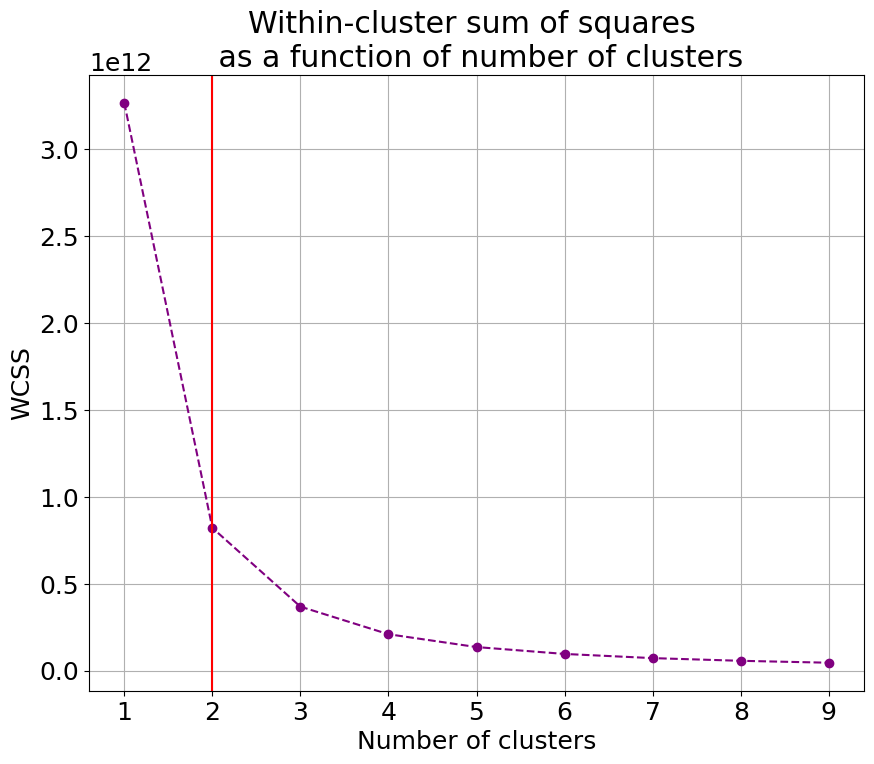

In [101]:
# Plot the WCSS against the number of clusters
fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})
plt.plot(k_vals, WCSS,color='purple',marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.title('Within-cluster sum of squares \n as a function of number of clusters')
plt.grid()
plt.axvline(x = 2,color ='red',label='elbow')
plt.show()
#plt.legend()
#fig.savefig('Elbow method')

## Silhouette Analysis

In [ ]:
# list for silhouette averages


# define a list for silhouette averages
SA = []
k_vals = range(2,10)
for k in k_vals:
    # Fit the MMS variables for each value of k
    KM_S = KMeans(n_clusters = k,init ='k-means++')
    KM_S.fit(all_vars[MMS2_vals])
    clust_labels = KM_S.labels_
    SA.append(silhouette_score(all_vars[MMS2_vals], clust_labels))

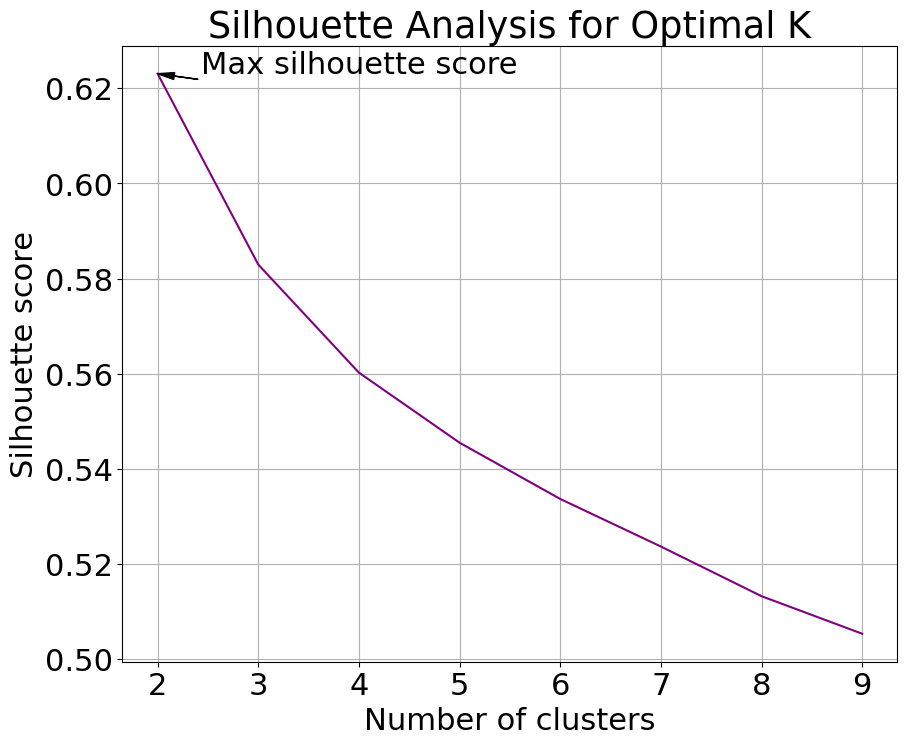

In [27]:
# plot Silhouette averages as a function of cluster number

fig = plt.figure(figsize=(10,8))
plt.plot(k_vals,SA,color='purple')    
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.annotate('Max silhouette score',
             xy = (2, max(SA)),
             xytext = (4, max(SA)),
             arrowprops = dict(facecolor = 'black', width = 0.1, headwidth = 5),
             horizontalalignment = 'center')

plt.grid()
plt.show()

fig.savefig('Silhouette_Analysis_for_optimal_k')

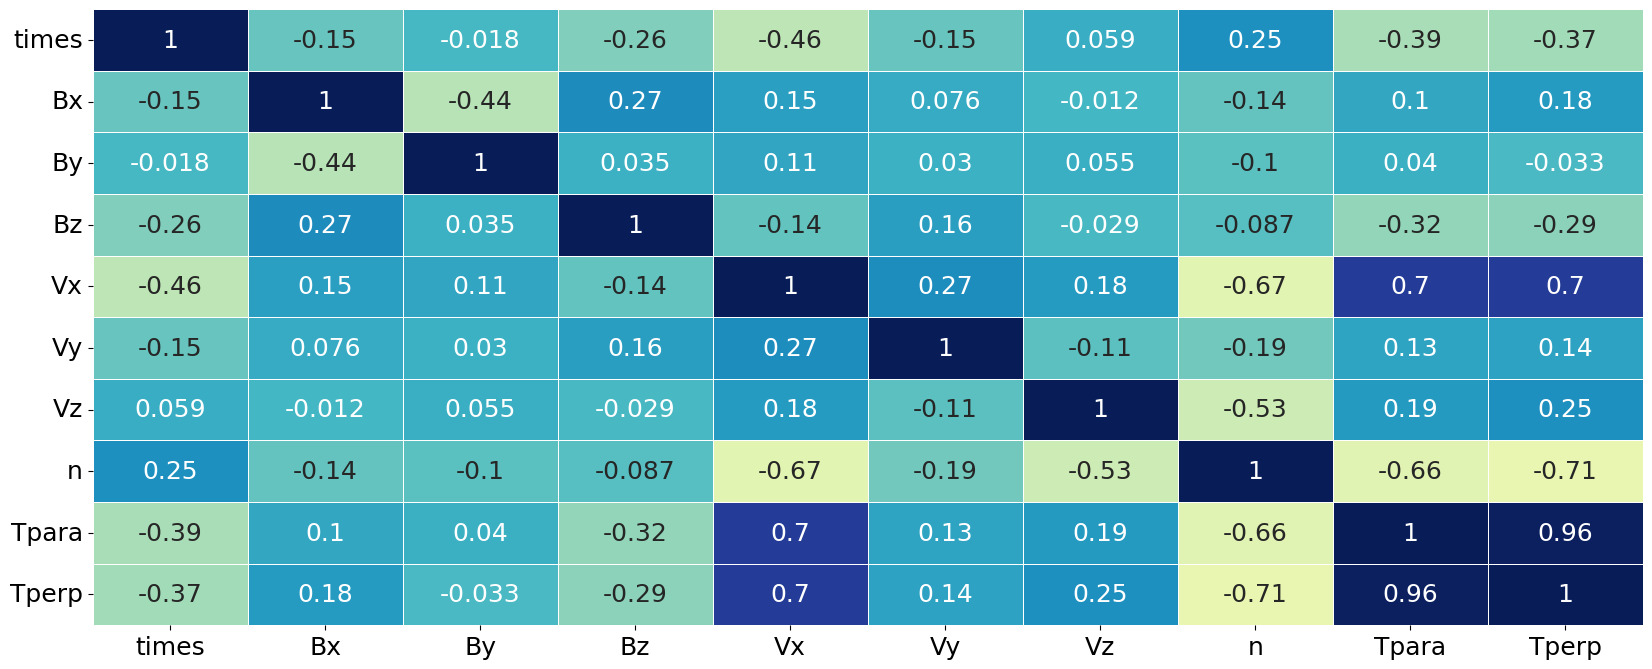

In [15]:
plt.figure(figsize=(20,8))

plt.rcParams.update({'font.size': 18})
sns.heatmap(all_vars.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

### Using 2 clusters, classify each data point

In [16]:
MMS2_values = all_vars.values
rob_scaler = RobustScaler()
x_scaled = rob_scaler.fit_transform(MMS2_values)
MMS2_scaled = pd.DataFrame(x_scaled,columns=all_vars.columns)


K = 2
#Modeling
kmeans = KMeans(K)
kfit = kmeans.fit(MMS2_scaled)
identified_clusters_scaled = kfit.predict(MMS2_scaled)
#Appending the identified clusters to the dataframe
clustered_data_scaled = all_vars.copy()
clustered_data_scaled['Cluster'] = identified_clusters_scaled
display(clustered_data_scaled.sort_values(by='Cluster'))

print(kmeans.n_iter_)




,times,Bx,By,Bz,Vx,Vy,Vz,n,Tpara,Tperp,Cluster
89042,1.592439e+09,3.173068,6.619074,12.860826,-150.435900,-8.459127,-29.541890,3.078326,131.45435,116.909910,0
46989,1.592433e+09,1.061396,8.330614,9.861493,-210.669270,-19.461304,-53.643944,5.304198,128.13466,65.219780,0
46990,1.592433e+09,1.054969,8.415325,9.948210,-211.784410,-20.926685,-60.563644,5.220391,127.96043,63.176770,0
46991,1.592433e+09,1.011315,8.421748,9.880576,-211.463420,-19.711138,-57.613327,5.297497,134.81738,70.623310,0
46992,1.592433e+09,0.942315,8.458428,9.963394,-211.945430,-19.825370,-59.234300,5.183117,125.38346,62.700405,0
...,...,...,...,...,...,...,...,...,...,...,...
39206,1.592432e+09,1.001688,9.101504,9.727750,-37.610560,11.293563,25.331540,0.783394,703.36020,601.079300,1
39205,1.592432e+09,0.999723,9.123992,9.747710,-47.328964,8.214587,23.014630,0.780475,752.11395,651.881300,1
39204,1.592432e+09,1.027315,9.156289,9.775221,-31.959800,9.958670,20.260271,0.799148,772.14120,631.699950,1
39215,1.592432e+09,0.919567,9.135366,9.778350,-45.575893,6.961341,28.818178,0.832587,751.73100,643.100650,1


7


### Plot the cluster number vs. date to see if there's a temporal relationship

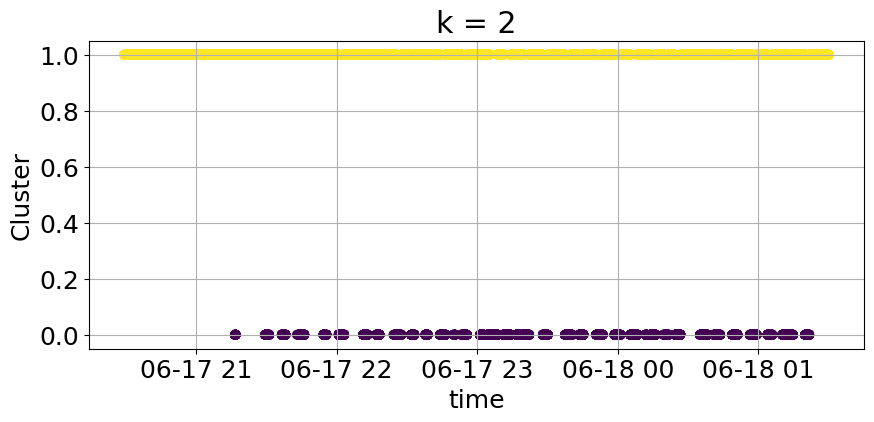

In [17]:
y = pd.to_datetime(all_vars['times'],unit='s')
fig = plt.figure(figsize=(10,4))
plt.xlabel('time')
plt.ylabel('Cluster')
plt.scatter(y,clustered_data_scaled['Cluster'],c = clustered_data_scaled['Cluster'])
plt.title('k = {}'.format(K))
plt.grid()
#fig.savefig('clusters_vs_times_k_{}'.format(K))

In [88]:
clustered_data_scaled

,times,Bx,By,Bz,Vx,Vy,Vz,n,Tpara,Tperp,Cluster
0,1.592426e+09,2.097465,8.011147,10.735126,15.434996,-15.474589,21.248777,0.997805,512.84296,565.21920,0
1,1.592426e+09,2.071061,8.044910,10.763581,23.745113,-4.320819,23.713049,0.972963,521.85095,540.27750,0
2,1.592426e+09,2.103240,8.018458,10.762193,19.791689,0.186993,22.602884,1.035904,507.67090,524.43600,0
3,1.592426e+09,2.080024,8.051444,10.759550,23.449820,-10.894620,22.887327,0.982830,470.00050,518.61220,0
4,1.592426e+09,2.092533,8.039735,10.758489,27.450294,-4.380808,20.096508,1.015891,484.51923,476.86050,0
...,...,...,...,...,...,...,...,...,...,...,...
120250,1.592444e+09,2.978616,8.729470,9.486099,13.641521,-0.398704,-19.052350,1.330059,313.05188,299.23694,0
120251,1.592444e+09,2.979639,8.719428,9.478873,18.381905,-1.303707,-25.395687,1.370617,313.85394,308.19710,0
120252,1.592444e+09,2.979639,8.719428,9.478873,5.641086,6.488843,-26.069427,1.340278,298.49936,294.27920,0
120253,1.592444e+09,2.979639,8.719428,9.478873,19.092445,0.803349,-14.849024,1.286046,319.49307,303.14572,0


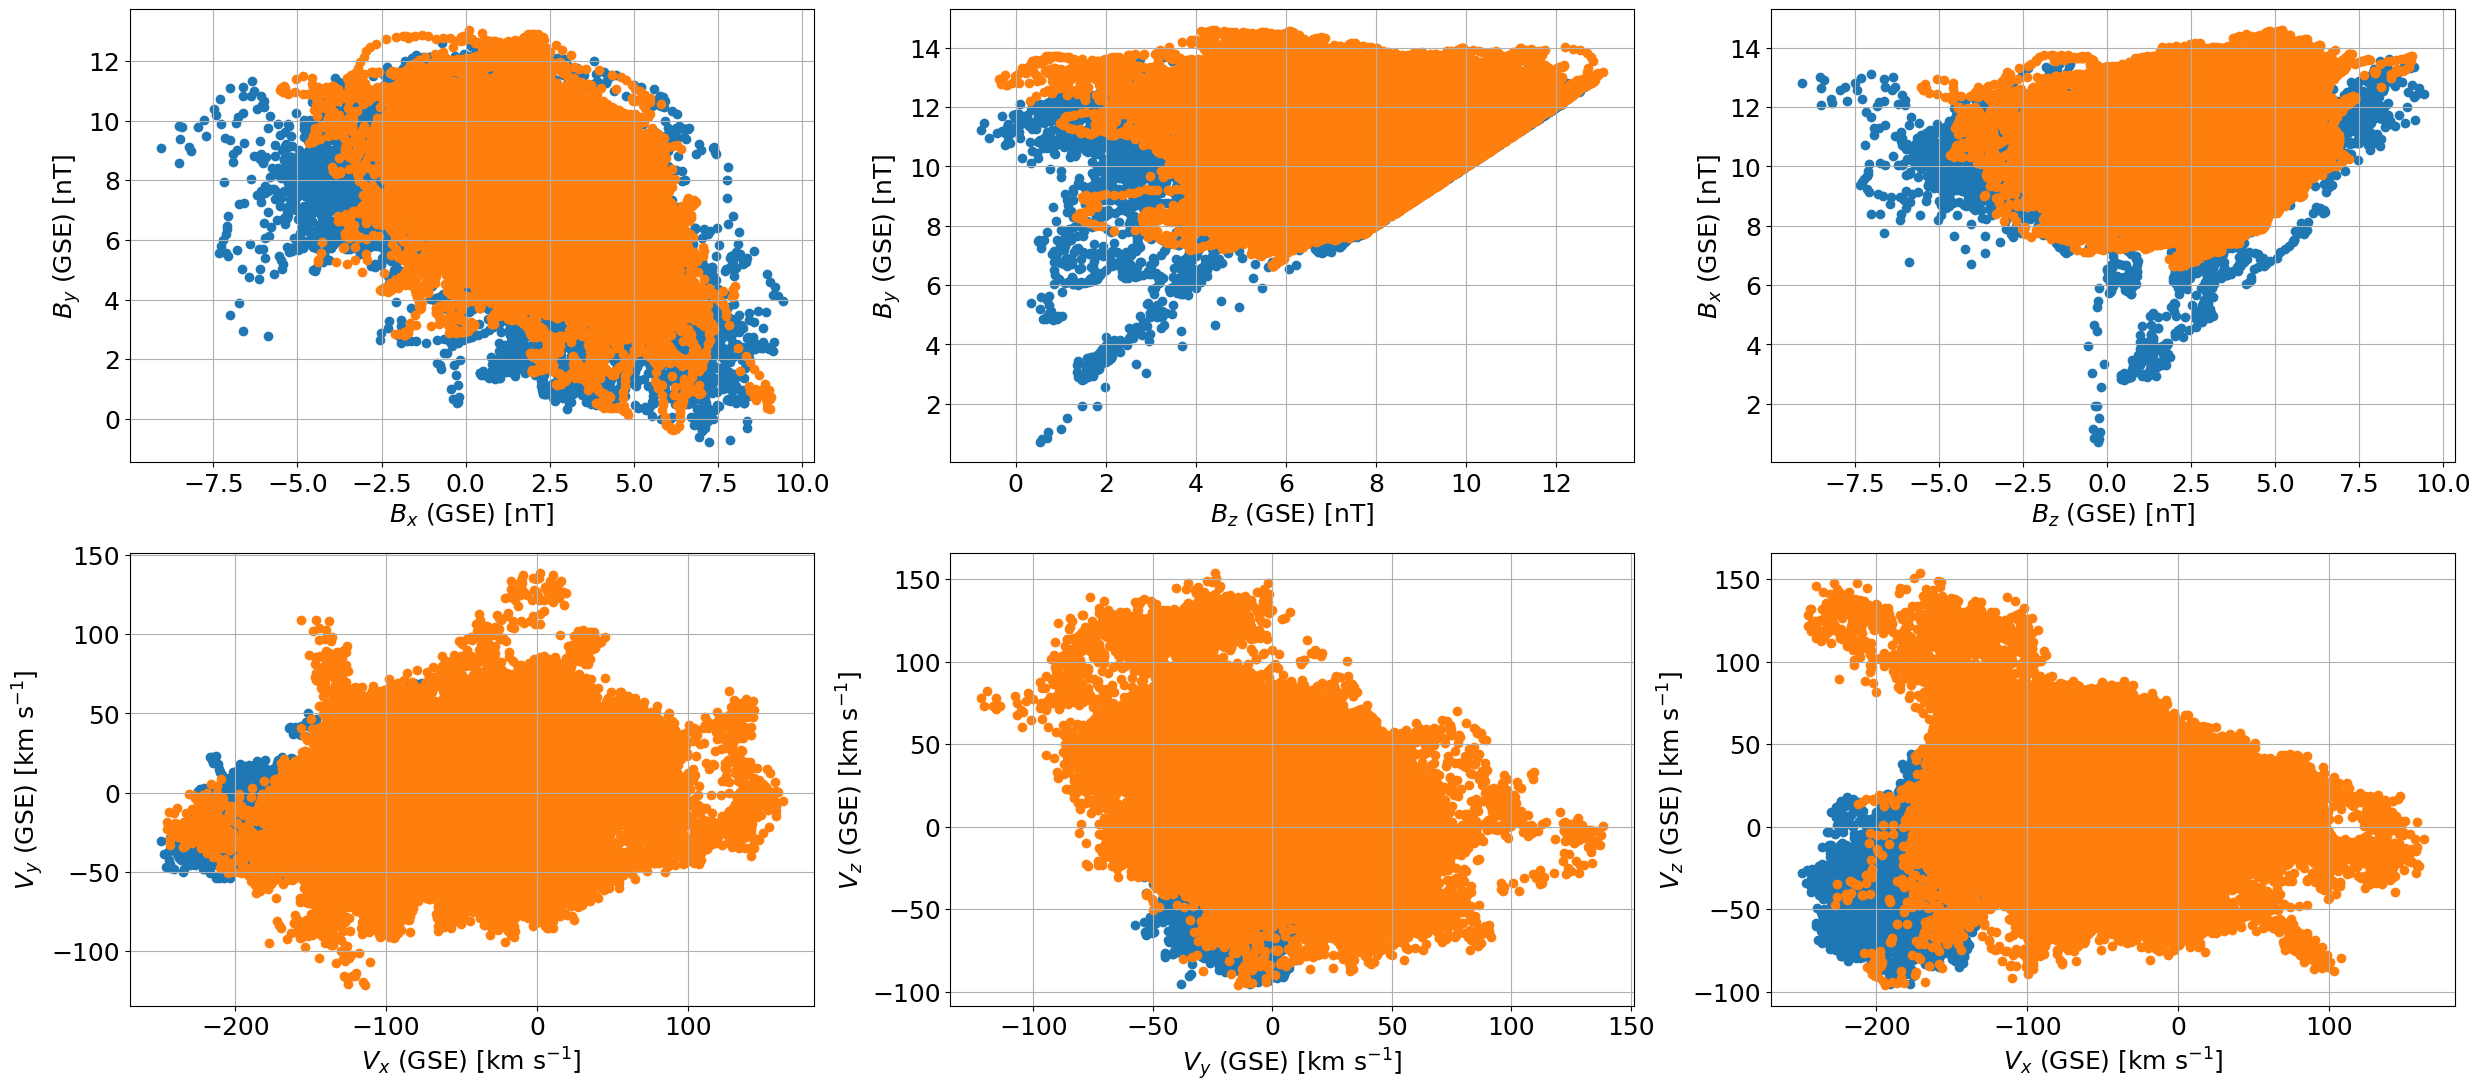

In [20]:
all_vars['Cluster'] = clustered_data_scaled['Cluster']

 
cluster1 = all_vars.index[all_vars['Cluster']==0].tolist()
cluster2 = all_vars.index[all_vars['Cluster']==1].tolist()

y = pd.to_datetime(all_vars['times'],unit='s')


fig = plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 18})


# Bx GSE
ax_Bx = fig.add_subplot(331)
ax_Bx.scatter(all_vars['Bx'][cluster1],all_vars['By'][cluster1],label='clust 1')
ax_Bx.scatter(all_vars['Bx'][cluster2],all_vars['By'][cluster2],label='clust 2')
ax_Bx.grid('on')
# Set title and labels for axes
ax_Bx.set(ylabel = '$B_y$ (GSE) [nT]')
ax_Bx.set(xlabel = '$B_x$ (GSE) [nT]')



ax_By = fig.add_subplot(332)
ax_By.scatter(all_vars['By'][cluster1],all_vars['Bz'][cluster1],label='clust 1')
ax_By.scatter(all_vars['By'][cluster2],all_vars['Bz'][cluster2],label='clust 2')
ax_By.grid('on')
# Set title and labels for axes
ax_By.set(ylabel = '$B_y$ (GSE) [nT]')
ax_By.set(xlabel = '$B_z$ (GSE) [nT]')



ax_Bz = fig.add_subplot(333)
ax_Bz.scatter(all_vars['Bx'][cluster1],all_vars['Bz'][cluster1],label='clust 1')
ax_Bz.scatter(all_vars['Bx'][cluster2],all_vars['Bz'][cluster2],label='clust 2')
ax_Bz.grid('on')
# Set title and labels for axes
ax_Bz.set(ylabel = '$B_x$ (GSE) [nT]')
ax_Bz.set(xlabel = '$B_z$ (GSE) [nT]')



ax_Vx = fig.add_subplot(334)
ax_Vx.scatter(all_vars['Vx'][cluster1],all_vars['Vy'][cluster1],label='clust 1')
ax_Vx.scatter(all_vars['Vx'][cluster2],all_vars['Vy'][cluster2],label='clust 2')
ax_Vx.grid('on')
# Set title and labels for axes
ax_Vx.set(xlabel = '$V_x$ (GSE) [km s$^{-1}$]')
ax_Vx.set(ylabel = '$V_y$ (GSE) [km s$^{-1}$]')


ax_Vy = fig.add_subplot(335)
ax_Vy.scatter(all_vars['Vy'][cluster1],all_vars['Vz'][cluster1],label='clust 1')
ax_Vy.scatter(all_vars['Vy'][cluster2],all_vars['Vz'][cluster2],label='clust 2')
ax_Vy.grid('on')
# Set title and labels for axes
ax_Vy.set(xlabel = '$V_y$ (GSE) [km s$^{-1}$]')
ax_Vy.set(ylabel = '$V_z$ (GSE) [km s$^{-1}$]')



ax_Vz = fig.add_subplot(336)
ax_Vz.scatter(all_vars['Vx'][cluster1],all_vars['Vz'][cluster1],label='clust 1')
ax_Vz.scatter(all_vars['Vx'][cluster2],all_vars['Vz'][cluster2],label='clust 2')
ax_Vz.grid('on')
# Set title and labels for axes
ax_Vz.set(xlabel = '$V_x$ (GSE) [km s$^{-1}$]')
ax_Vz.set(ylabel = '$V_z$ (GSE) [km s$^{-1}$]')




ax_n = fig.add_subplot(337)
ax_n.scatter(all_vars['Vx'][cluster1],all_vars['Vz'][cluster1],label='clust 1')
ax_n.scatter(all_vars['Vx'][cluster2],all_vars['Vz'][cluster2],label='clust 2')
ax_n.grid('on')
# Set title and labels for axes
ax_n.set(xlabel = '$V_x$ (GSE) [km s$^{-1}$]')
ax_n.set(ylabel = '$V_z$ (GSE) [km s$^{-1}$]')

plt.show()

In [ ]:

# Find out which scaling method produces the best Silhouette score

# Code pasted directly from "Clustering Complete Pre Lecture Code.ipynb"
km = KMeans(n_clusters = 2,init ='k-means++')




# Try scaling with standard scaler
df_pca_ss = km.fit_transform(ss_x)
model_ss = kmean.fit(df_pca_ss)
y_hc = kmean.predict(df_pca_ss)
labels_ss = kmean.labels_
print("scores of pca  with StandardScaler")
print('Silhoutte score of kmean is ' , silhouette_score(df_pca_ss, labels_ss))
print("\n******************************************************************")

# scale with minmax
df_pca_min = pca.fit_transform(min_x)
model_min = kmean.fit(df_pca_min)
y_h = kmean.fit_predict(df_pca_min)
labels_kmean_min = kmean.labels_
print("scores of pca with MinMaxScaler")
print('Silhoutte score of kmean is ' , silhouette_score(df_pca_min, labels_kmean_min))
print("\n******************************************************************")


# scale with robust
df_pca_rob = pca.fit_transform(rob_x)
model_rob = kmean.fit(df_pca_rob)
y_min = kmean.fit_predict(df_pca_rob)
labels_kmean_rob = kmean.labels_
print("scores of pca with RobustScaler")
print('Silhoutte score of kmean is ' , silhouette_score(df_pca_rob, labels_kmean_rob))
print("\n******************************************************************")

In [6]:
pca = PCA()
kmean = KMeans(n_clusters = 2,init ='k-means++')
df_pca = pca.fit_transform(rob_x)
model = kmean.fit(df_pca)
y_min = kmean.fit_predict(df_pca)
labels_kmean = kmean.labels_
print("scores of pca with RobustScaler")
print('Silhoutte score of kmean is ' , silhouette_score(df_pca, labels_kmean))
print('davies bouldin score of kmean is ' , davies_bouldin_score(df_pca, labels_kmean))


scores of pca with RobustScaler
Silhoutte score of kmean is  0.40962973277638653
davies bouldin score of kmean is  1.0165981034961582


In [7]:
# Code taken from class:

# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [8]:
# Code taken from class:
# Function that creates Parallel Plots
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [9]:
centers = model.cluster_centers_

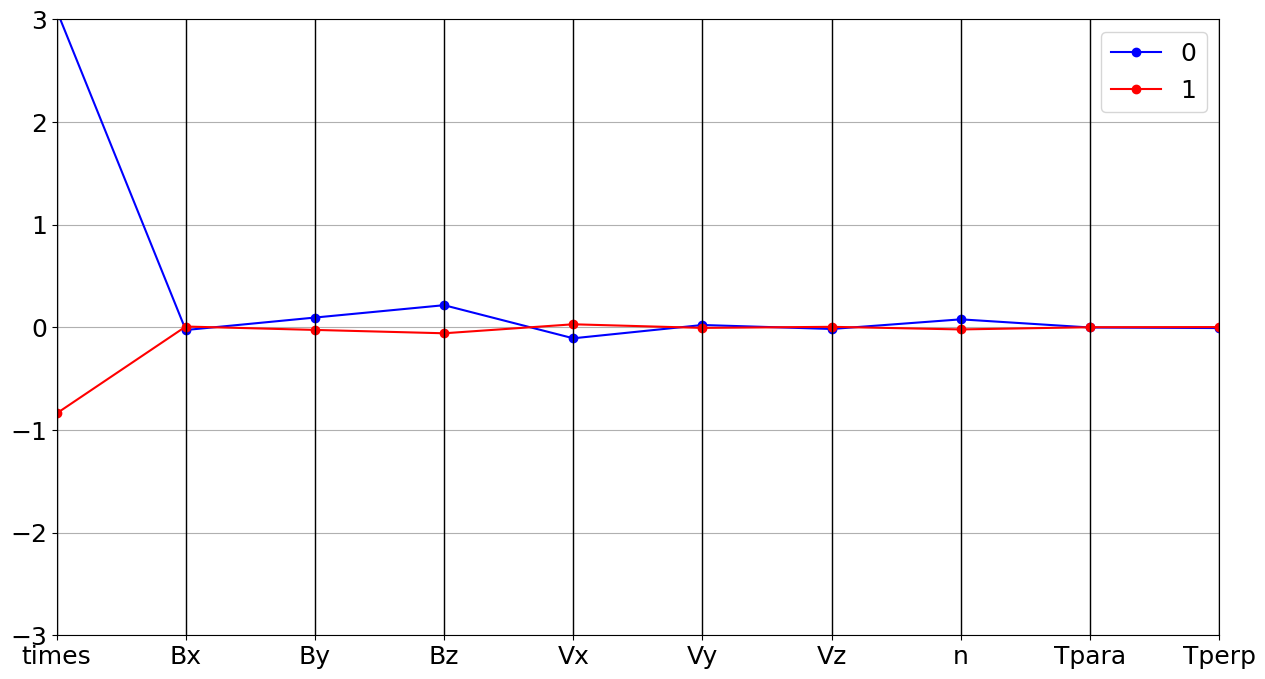

In [22]:
# create parallel plots

P = pd_centers(MMS2_vals, centers)
P


def pd_centers1(features_used, centers):
    colNames = list(features_used)
    colNames.append('prediction')
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    P = pd.DataFrame(Z,columns = colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P


#2. create a function that creates parallel plots. 

def par_plots(data):
    my_colors = list(islice(cycle(['b','r','g','y','k']), None, len(data)))
    plt.figure(figsize = (15,8)).gca().axes.set_ylim([-3,3])
    parallel_coordinates(data,'prediction',color = my_colors, marker ='o')
    
P = pd_centers1(MMS2_vals, centers)
par_plots(P)  

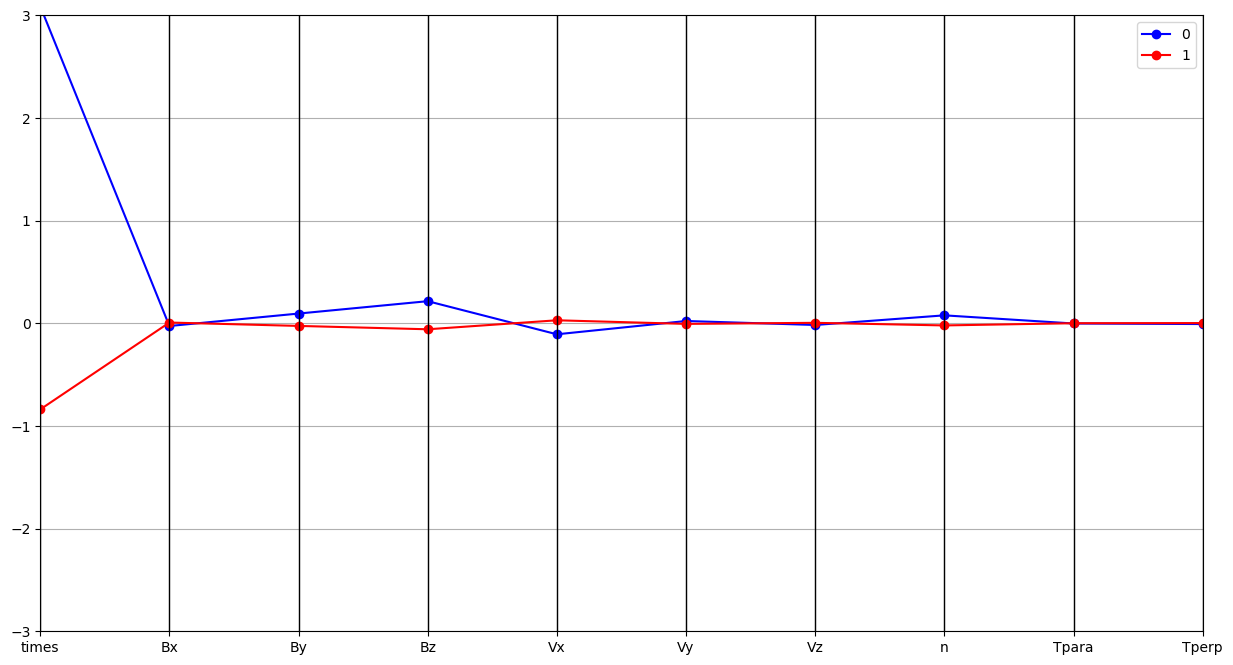

In [12]:
parallel_plot(P)

## K-means with PCA

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,normalize,RobustScaler,MinMaxScaler
#import scipy.cluster.hierarchy as shc
# from scipy.cluster.hierarchy import dendrogram, linkage
# import collections
from sklearn.decomposition import PCA
%matplotlib inline 

import sys
sys.setrecursionlimit(20000) # or any number you want

sys.getrecursionlimit()

all_vars = pd.read_csv('all_vars_outliers_removed copy.csv',header = 0,
                       usecols = ['times','Bx','By','Bz','Vx','Vy','Vz','n','Tpara','Tperp'])

all_vars_a = all_vars

#all_vars_a = all_vars[:index_to_stop]
print(np.shape(all_vars_a))

scaler = RobustScaler()
robb = scaler.fit_transform(all_vars_a)
pca = PCA()

pca.fit(robb)

pca2 = PCA(n_components = 2)
pca2.fit(robb)

#pca2.transform(robb)
scores_pca = pca2.transform(robb)

wcss=[]

for i in range(1,10):
    kmeans_pca = KMeans(n_clusters = i,max_iter=150)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

1202
(120251, 10)


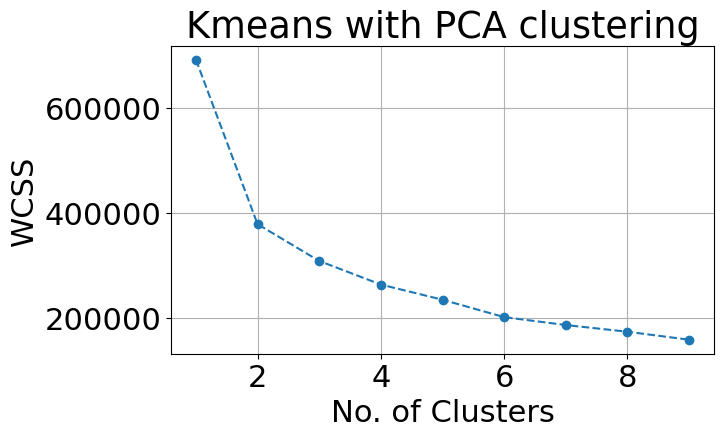

In [16]:
plt.figure(figsize=(7,4))
plt.plot(range(1,10),wcss, marker='o', linestyle='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters')
plt.title('Kmeans with PCA clustering')
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.show()

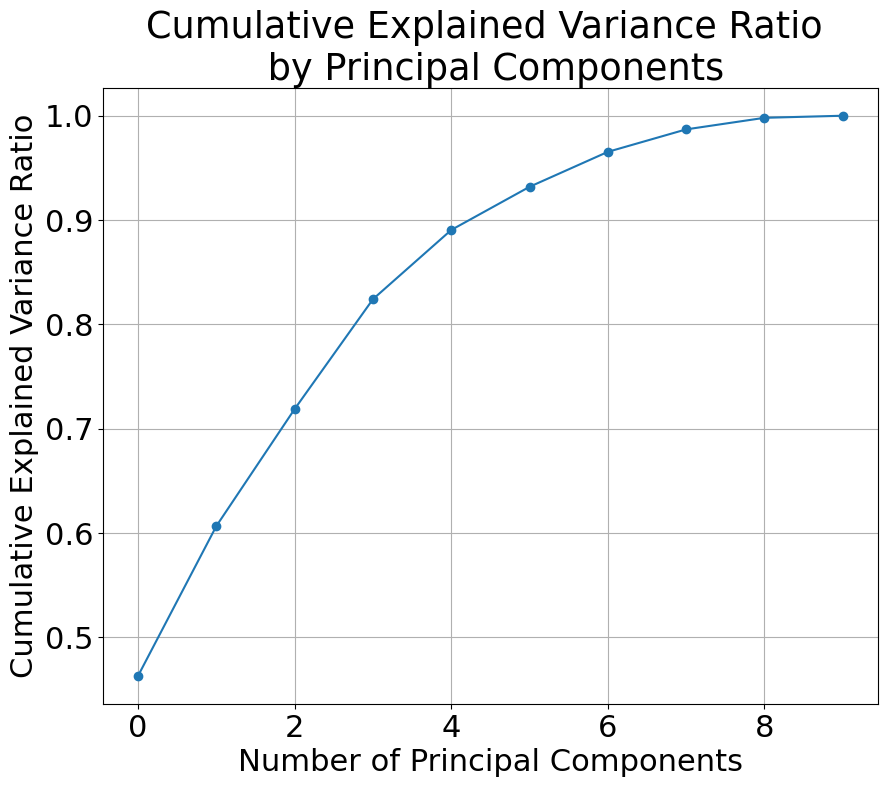

In [21]:
#pca.explained_variance_ratio_[:k].sum()
%matplotlib inline
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

#Print results
print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
print(f"Total Explained Variance Ratio: {total_explained_variance_ratio:.4f}")



# Plot explained variance ratio
fig = plt.figure(figsize=(10,8))
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio \n by Principal Components')
plt.grid()
plt.show()
fig.savefig('cum_explnd_var_ratio_by_PC')
# 

Shape before PCA:  (120251, 10)
Shape after PCA:  (120251, 2)
************************************
PCA components: [[ 0.11247375 -0.08652492 -0.03696055 -0.00309458 -0.28152336 -0.11174591
  -0.20236556  0.81824418 -0.29524335 -0.29849773]
 [-0.13846734  0.72943027 -0.46205593  0.38540453  0.00360069  0.23597891
  -0.15530909  0.03855886 -0.07040333 -0.02150812]]
************************************
PCA explained variance: [3.23371182 1.00167274]
************************************
PCA mean: [ 2.49887467e-06 -5.62768234e-02 -1.02939106e-01  1.28483965e-02
  1.40529822e-02  7.02831510e-02 -1.53604578e-02  6.86030842e-01
  5.17760287e-02  1.25832847e-02]


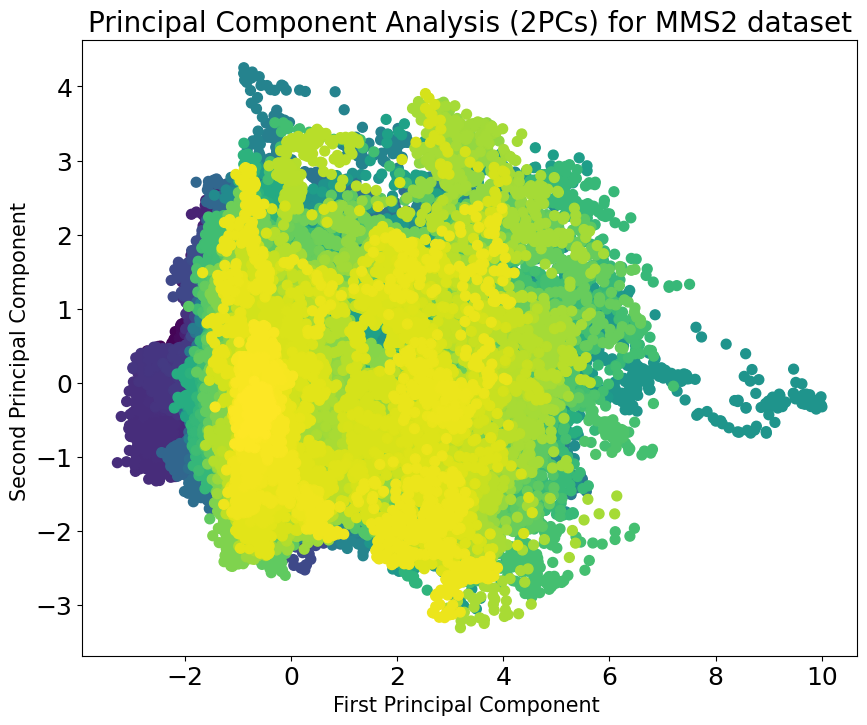

In [52]:
X = all_vars_a.values

y = pd.to_datetime(all_vars['times'],unit='s')

# scale with robust
X = RobustScaler().fit_transform(X)


# Instantiate PCA using 2 components
pca_2 = PCA(n_components = 2)

# Fit PCA to features
PCs = pca_2.fit_transform(X)



print('Shape before PCA: ', X.shape)

print('Shape after PCA: ', PCs.shape)
print('************************************')


# Create a new dataset from principal components 
df = pd.DataFrame(data = PCs, columns = ['PC1', 'PC2'])


print('PCA components:',pca_2.components_)
print('************************************')
print('PCA explained variance:',pca_2.explained_variance_)
print('************************************')


print('PCA mean:',pca_2.mean_)

fig = plt.figure(figsize=(10,8))

plt.scatter(PCs[:, 0], PCs[:, 1], c=y,s=50)
plt.xlabel('First Principal Component ', fontsize = 15)
plt.ylabel('Second Principal Component ', fontsize = 15)
plt.title('Principal Component Analysis (2PCs) for MMS2 dataset', fontsize = 20)

plt.show()

fig.savefig('PCA_MMS2')

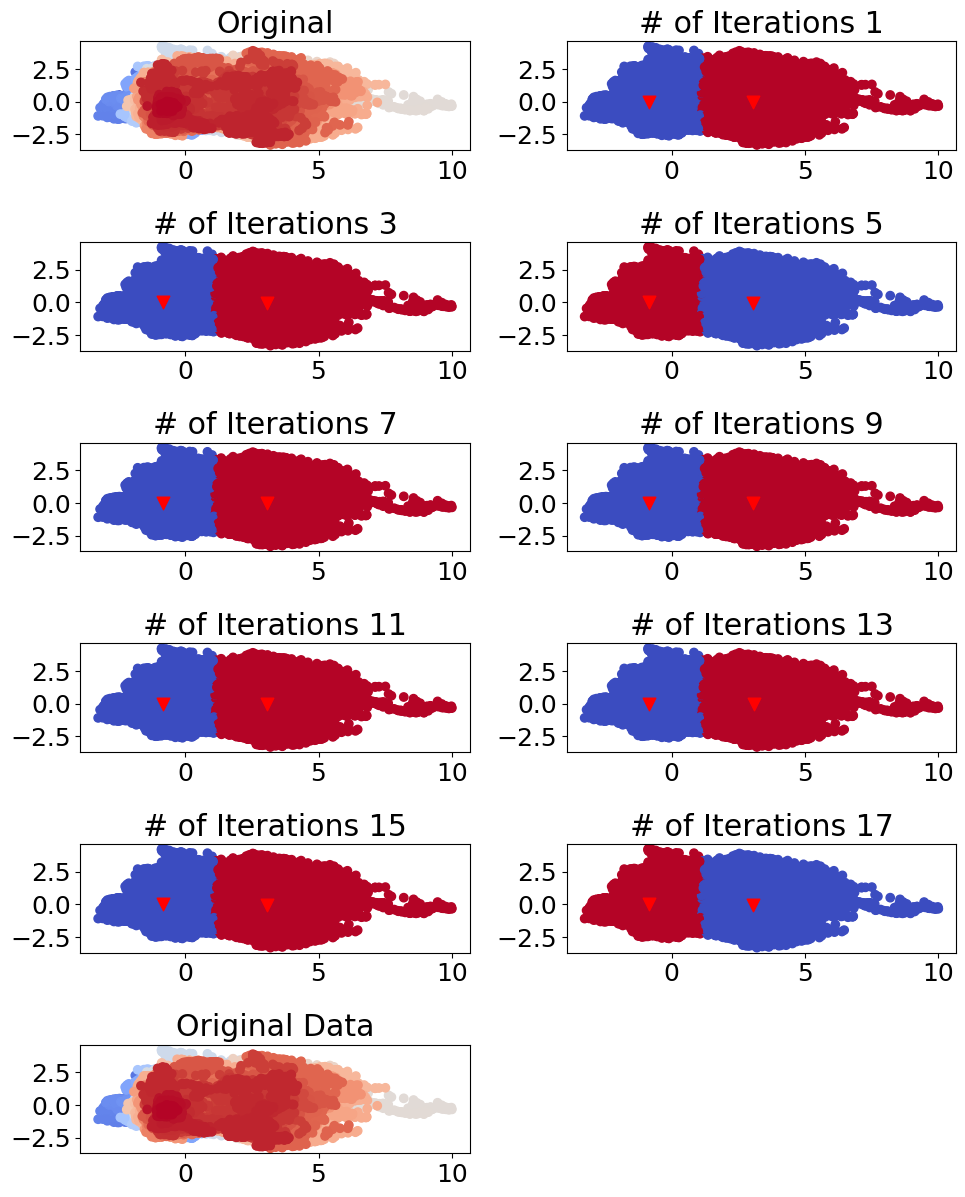

In [53]:
fig = plt.figure(figsize=(10,20))
m = 10
for i in range(1,m):
    #km = KMeans(n_clusters = 2, max_iter = 2*i-1, init = 'k-means++', n_init = 1, random_state = 101)
    km = KMeans(n_clusters = 2, init = 'k-means++')

    km.fit(df)
    labels = km.labels_
    centers = km.cluster_centers_
    
    plt.subplot(m,2,i+1)
    
    plt.scatter(df['PC1'],df['PC2'],c = labels, cmap='coolwarm')
    plt.scatter(x = centers[:,0], y = centers[:,1], color = 'r', marker = 'v',s = 82)
    plt.title("# of Iterations {}".format(2*i-1))
    
plt.subplot(m,2,1)
plt.scatter(df['PC1'],df['PC2'],c = y, cmap = 'coolwarm')
plt.title("Original")

plt.subplot(m,2,m+1)
plt.scatter(df['PC1'],df['PC2'],c = y, cmap = 'coolwarm')
plt.title("Original Data")
    
plt.tight_layout()
plt.show()


fig.savefig('comparison_of_cluster_numbers')

# Hierarchial Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.preprocessing import StandardScaler,normalize,RobustScaler,MinMaxScaler
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
import collections
from sklearn.decomposition import PCA, KernelPCA,TruncatedSVD
%matplotlib inline 

import sys
sys.setrecursionlimit(30000) # or any number you want

all_vars = pd.read_csv('all_vars_outliers_removed copy.csv',header = 0,
                       usecols = ['times','Bx','By','Bz','Vx','Vy','Vz','n','Tpara','Tperp'])


indices_to_drop = [36,69,845,909]
all_vars = all_vars.drop(index=indices_to_drop)

parts = np.linspace(0,len(all_vars)/2

part1 = all_vars[0:len(all_vars)/5]


# Scale data 
MMS2_vals = ['times','Bx','By','Bz','Vx','Vy','Vz','n','Tpara','Tperp']


# scale with robust
rob_x = RobustScaler().fit_transform(all_vars2[MMS2_vals].values)
z = shc.linkage(rob_x, metric='cosine', method='complete') 


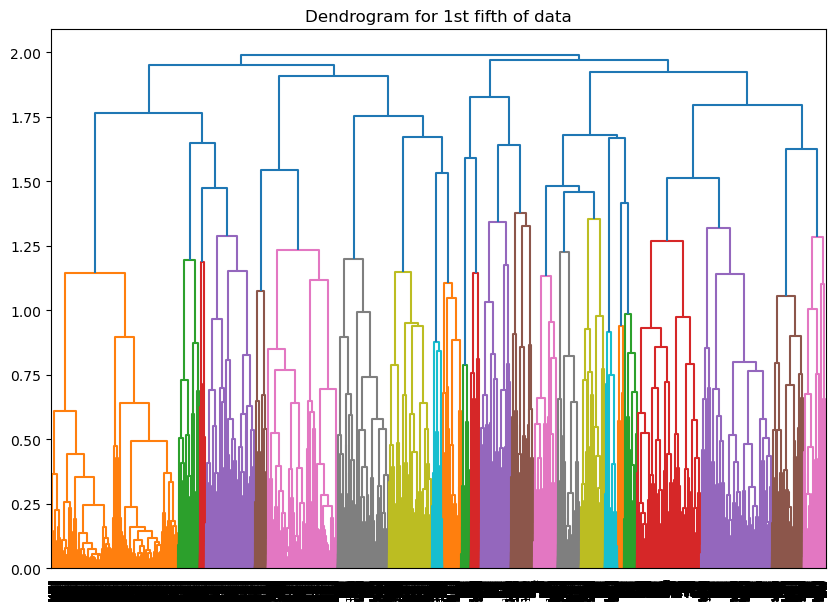

<Figure size 640x480 with 0 Axes>

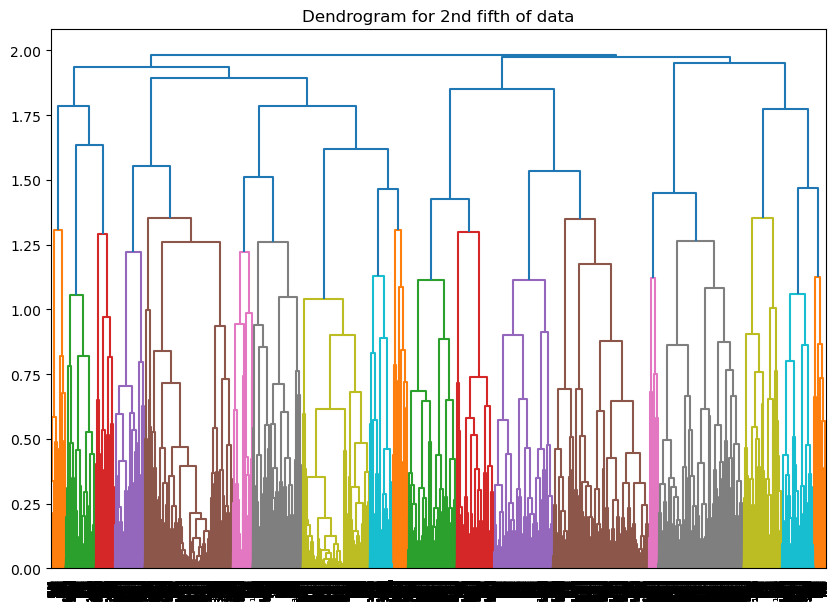

<Figure size 640x480 with 0 Axes>

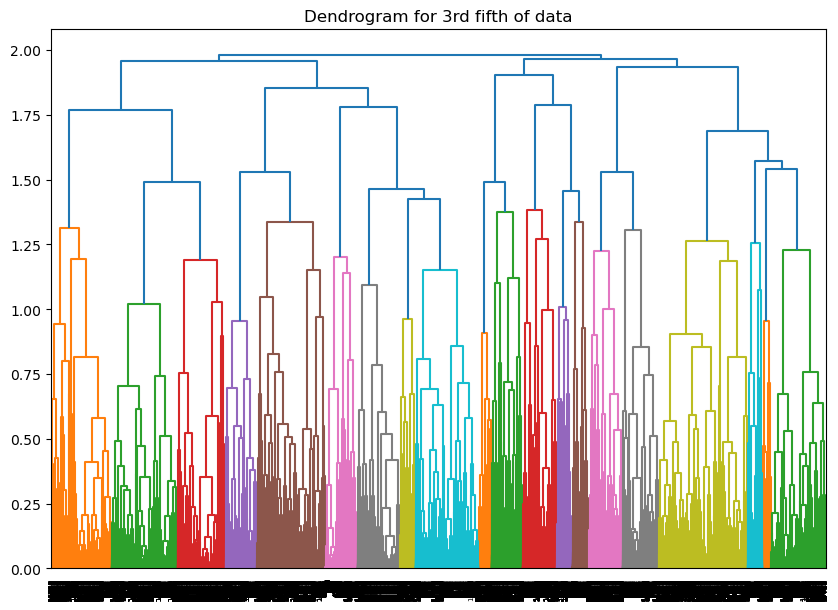

<Figure size 640x480 with 0 Axes>

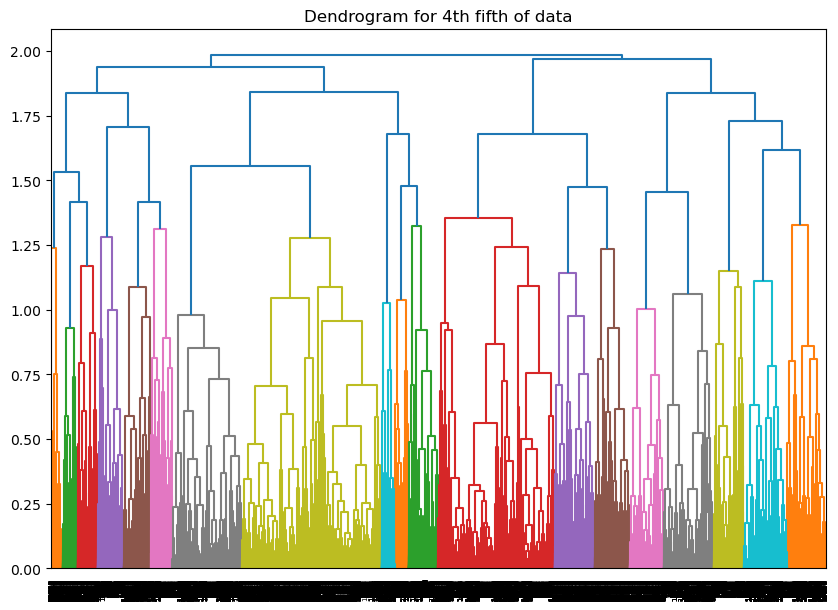

<Figure size 640x480 with 0 Axes>

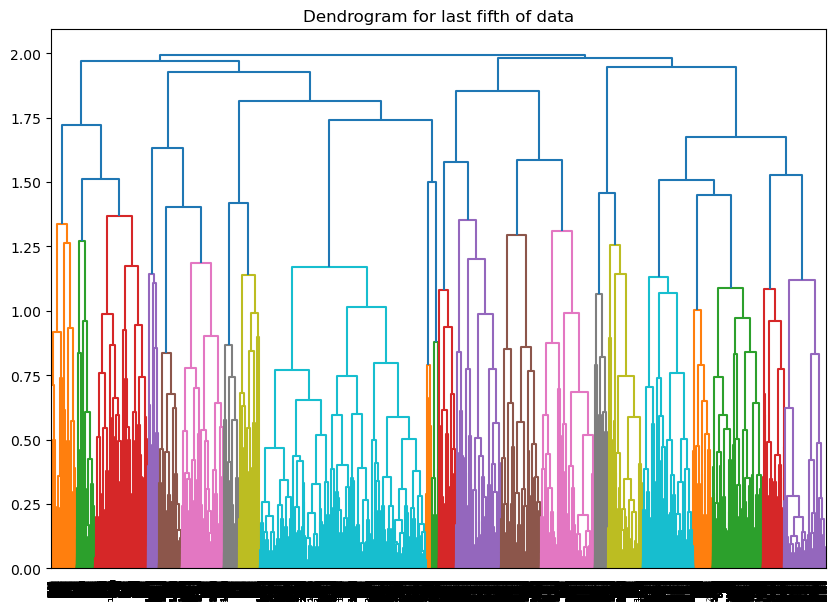

<Figure size 640x480 with 0 Axes>

In [11]:
part1 = all_vars[0:int(len(all_vars)/5)]
part2 = all_vars[int(len(all_vars)/5):int((len(all_vars)/5)*2)]
part3 = all_vars[int((len(all_vars)/5)*2):int((len(all_vars)/5)*3)]
part4 = all_vars[int((len(all_vars)/5)*3):int((len(all_vars)/5)*4)]
part5 = all_vars[int((len(all_vars)/5)*4):int((len(all_vars)/5)*5)]


# scale with robust
rob_x = RobustScaler().fit_transform(part1.values)
z = shc.linkage(rob_x, metric='cosine', method='complete') 
fig = plt.figure(figsize =(10,7))
plt.title('Dendrogram for 1st fifth of data')
dend = shc.dendrogram(z)
plt.show()
plt.savefig('Dendrogram_pt1')



rob_x = RobustScaler().fit_transform(part2.values)
z = shc.linkage(rob_x, metric='cosine', method='complete') 
fig = plt.figure(figsize =(10,7))
plt.title('Dendrogram for 2nd fifth of data')
dend = shc.dendrogram(z)
plt.show()
plt.savefig('Dendrogram_pt2')



rob_x = RobustScaler().fit_transform(part3.values)
z = shc.linkage(rob_x, metric='cosine', method='complete') 
fig = plt.figure(figsize =(10,7))
plt.title('Dendrogram for 3rd fifth of data')
dend = shc.dendrogram(z)
plt.show()
plt.savefig('Dendrogram_pt3')


rob_x = RobustScaler().fit_transform(part4.values)
z = shc.linkage(rob_x, metric='cosine', method='complete') 
fig = plt.figure(figsize =(10,7))
plt.title('Dendrogram for 4th fifth of data')
dend = shc.dendrogram(z)
plt.show()
plt.savefig('Dendrogram_pt4')



rob_x = RobustScaler().fit_transform(part5.values)
z = shc.linkage(rob_x, metric='cosine', method='complete') 
fig = plt.figure(figsize =(10,7))
plt.title('Dendrogram for last fifth of data')
dend = shc.dendrogram(z)
plt.show()
plt.savefig('Dendrogram_pt5')

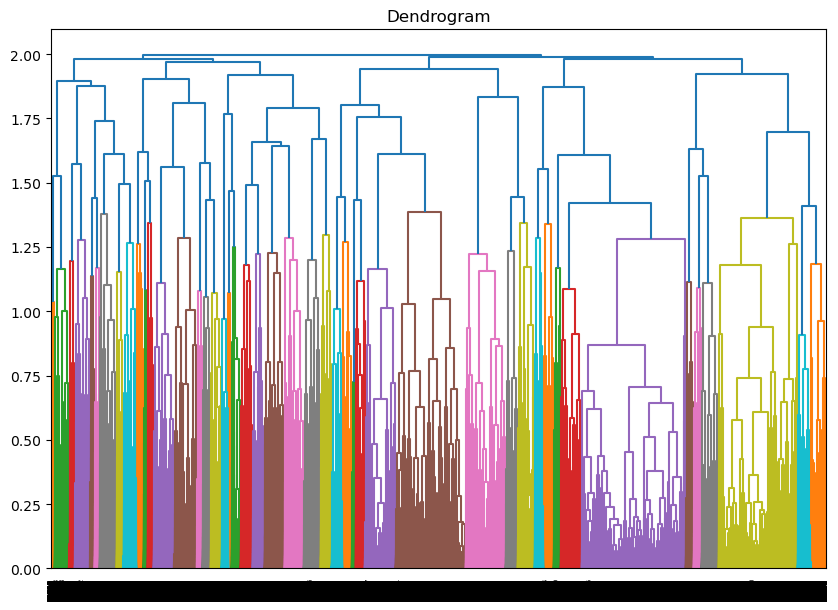

In [3]:
fig = plt.figure(figsize =(10,7))
plt.title('Dendrogram')
dend = shc.dendrogram(z)
#plt.axhline(y=80, color='r', linestyle='--')
plt.show()
#fig.savefig('clusters_vs_times_k_{}'.format(K))

plt.savefig('Dendrogram_{}'.format(frac))